# Problem

https://www.kaggle.com/c/forest-cover-type-prediction
    
In this competition you are asked to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

# Load and process the data

In [6]:
# http://scikit-learn.org/stable/datasets/index.html
from sklearn import datasets

# http://scikit-learn.org/stable/model_selection.html
from sklearn import model_selection

# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
from matplotlib import pyplot as plt

# https://seaborn.pydata.org
import seaborn as sns

# http://www.numpy.org/
import numpy as np

# https://docs.python.org/2/library/csv.html
import csv

ModuleNotFoundError: No module named 'seaborn'

In [4]:
# load data from the csv
with open('train.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    features = next(reader)
    data = [[int(value) for value in row] for row in reader]

NameError: name 'csv' is not defined

In [3]:
# print the features and the values of the first example
for f, v in zip(features, data[0]):
    print("{:40s}: {}".format(f, v))

NameError: name 'features' is not defined

In [3]:
# convert one hot to numerical
Wilderness = [np.argmax(x[11:14]) + 1 for x in data]
Soil_Type = [np.argmax(x[15:54]) + 1 for x in data]

NameError: name 'data' is not defined

In [1]:
print(wilderness)

NameError: name 'wilderness' is not defined

In [5]:
# ceate x and y sets
x = [x[:11] + [w] + [s] for x, w, s in zip(data, Wilderness, Soil_Type)]
y = [x[-1] for x in data]

# modify the feature list
features = features[:11] + ["Wilderness", "Soil_Type"]

In [6]:
# print the features and the values of the first example
for f, v in zip(features, x[0]):
    print("{:40s}: {}".format(f, v))
print("\nClass: {}".format(y[0]))

Id                                      : 1
Elevation                               : 2596
Aspect                                  : 51
Slope                                   : 3
Horizontal_Distance_To_Hydrology        : 258
Vertical_Distance_To_Hydrology          : 0
Horizontal_Distance_To_Roadways         : 510
Hillshade_9am                           : 221
Hillshade_Noon                          : 232
Hillshade_3pm                           : 148
Horizontal_Distance_To_Fire_Points      : 6279
Wilderness                              : 1
Soil_Type                               : 29

Class: 5


# Data analysis

In [7]:
# class distribution
for target in set(y):
    print("{:2d}: {:6.2f}%".format(target, 100 * y.count(target) / len(y)))

 1:  14.29%
 2:  14.29%
 3:  14.29%
 4:  14.29%
 5:  14.29%
 6:  14.29%
 7:  14.29%


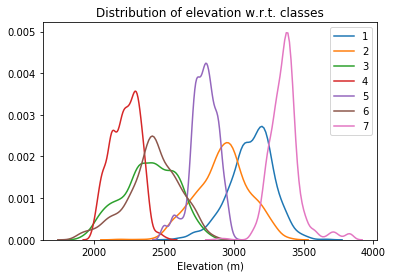

In [8]:
# distribution of elevation w.r.t. classes
for j in set(y):
    sns.distplot([v[1] for v, c in zip(x, y) if c==j], hist=False, label=j)
plt.title("Distribution of elevation w.r.t. classes")
plt.xlabel("Elevation (m)")
plt.show()

# Naive Bayes model

In [9]:
# randomly split the data into a train set and test set
# stratify allows to the keep the classes' distribution in each subset
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.5, stratify=y)

In [10]:
# http://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes
from sklearn.naive_bayes import GaussianNB

# create the Naive Bayes model
gnb = GaussianNB()

# fit the model with the training subset
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Bayes theorem:

$$ P(y|x_1, ..., x_n) = \frac{P(y)P(x_1, ..., x_n|y)}{P(x_1, ..., x_n)}$$

Naive Bayes makes the assumption of conditional independance (between features):

$$ P(x_1, ..., x_n|y) = \prod_{i=1}^{n}P(x_i|y) $$

The posterior is then equal to:

$$ P(y|x_1, ..., x_n) = \frac{P(y)\prod_{i=1}^{n}P(x_i|y)}{P(x_1, ..., x_n)}$$

$P(x_1, ..., x_n)$ is constant givent the input. So:

$$ P(y|x_1, ..., x_n) \propto P(y)\prod_{i=1}^{n}P(x_i|y)$$

The prediction is:

$$ \hat{y} = \underset{y}{argmax}\:P(y)\prod_{i=1}^{n}P(x_i|y)$$

Because the values are numerical, one can not estimate the $P(x_i|y)$ by counting the examples. Instead, $P(x_i|y)$ is assumed to be gaussian:

$$P(x_i|y)=\frac{1}{\sqrt{2\pi \sigma_y^2}}e^{-\frac{(x_i-\mu_y)^2}{2\sigma_y^2}}$$


$\sigma_y^2$ and $\mu_y$ parameters are estimated using maximum likelihood.

The log-likelihood:

$$l(\sigma_y^2, \mu_y) = log\big(L(\sigma_y^2, \mu_y)\big)= \sum_{i=1}^{n}log\bigg(\frac{1}{\sqrt{2\pi \sigma_y^2}}\bigg){-\frac{(x_i-\mu_y)^2}{2\sigma_y^2}}$$

$$(\hat{\sigma_y}^2, \hat{\mu_y})=\underset{(\sigma_y^2, \mu_y)}{argmax}\:l(\sigma_y^2, \mu_y)$$

For more detail, see: http://scikit-learn.org/stable/modules/naive_bayes.html

In [11]:
# evaluate the precision on the test set
print("Precision = {:.2f}%".format(100 * gnb.score(x_test, y_test)))

Precision = 63.11%


In [12]:
# alternative method
predictions = gnb.predict(x_test)
print("Precision = {:.2f}%".format(np.mean(predictions == y_test) * 100))

Precision = 63.11%


In [4]:
# we can also get the probabilities
proba = gnb.predict_proba(x_test)

# probabilities for the first exemple in the test set
print("Prediction | Probability | True label")
for i in range(10):
    print("{:10d} | {:10.2f}% | {:10d}".format(predictions[i], 100 * np.max(proba[i]), y_test[i]))

NameError: name 'gnb' is not defined